In [1]:
from ucimlrepo import fetch_ucirepo 
  
credit_approval = fetch_ucirepo(id=27) 
X = credit_approval.data.features 
y = credit_approval.data.targets 
 
print(credit_approval.variables) 


   name     role         type demographic description units missing_values
0   A16   Target  Categorical        None        None  None             no
1   A15  Feature   Continuous        None        None  None             no
2   A14  Feature   Continuous        None        None  None            yes
3   A13  Feature  Categorical        None        None  None             no
4   A12  Feature  Categorical        None        None  None             no
5   A11  Feature   Continuous        None        None  None             no
6   A10  Feature  Categorical        None        None  None             no
7    A9  Feature  Categorical        None        None  None             no
8    A8  Feature   Continuous        None        None  None             no
9    A7  Feature  Categorical        None        None  None            yes
10   A6  Feature  Categorical        None        None  None            yes
11   A5  Feature  Categorical        None        None  None            yes
12   A4  Feature  Categor

In [2]:
import pandas as pd 
df = pd.concat([X,y],axis=1)
df_original = df.copy()


In [3]:
df.head()

,A15,A14,A13,A12,A11,A10,A9,A8,A7,A6,A5,A4,A3,A2,A1,A16
0,0,202.0,g,f,1,t,t,1.25,v,w,g,u,0.000,30.83,b,+
1,560,43.0,g,f,6,t,t,3.04,h,q,g,u,4.460,58.67,a,+
2,824,280.0,g,f,0,f,t,1.50,h,q,g,u,0.500,24.50,a,+
3,3,100.0,g,t,5,t,t,3.75,v,w,g,u,1.540,27.83,b,+
4,0,120.0,s,f,0,f,t,1.71,v,w,g,u,5.625,20.17,b,+


## EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A15     690 non-null    int64  
 1   A14     677 non-null    float64
 2   A13     690 non-null    object 
 3   A12     690 non-null    object 
 4   A11     690 non-null    int64  
 5   A10     690 non-null    object 
 6   A9      690 non-null    object 
 7   A8      690 non-null    float64
 8   A7      681 non-null    object 
 9   A6      681 non-null    object 
 10  A5      684 non-null    object 
 11  A4      684 non-null    object 
 12  A3      690 non-null    float64
 13  A2      678 non-null    float64
 14  A1      678 non-null    object 
 15  A16     690 non-null    object 
dtypes: float64(4), int64(2), object(10)
memory usage: 86.4+ KB


In [5]:
df.isnull().sum()

A15     0
A14    13
A13     0
A12     0
A11     0
A10     0
A9      0
A8      0
A7      9
A6      9
A5      6
A4      6
A3      0
A2     12
A1     12
A16     0
dtype: int64

In [6]:
df['A16'].head()

0    +
1    +
2    +
3    +
4    +
Name: A16, dtype: object

In [7]:
df['A16'].unique()

array(['+', '-'], dtype=object)

In [8]:
print(df['A16'].value_counts(dropna=False))


A16
-    383
+    307
Name: count, dtype: int64


In [9]:

df['A16'] = df['A16'].astype(str).str.strip()
df['A16'] = df['A16'].map({'+': 1, '-': 0})

df = df[df['A16'].notna()]

print(df['A16'].unique())


[1 0]


## Count Plot

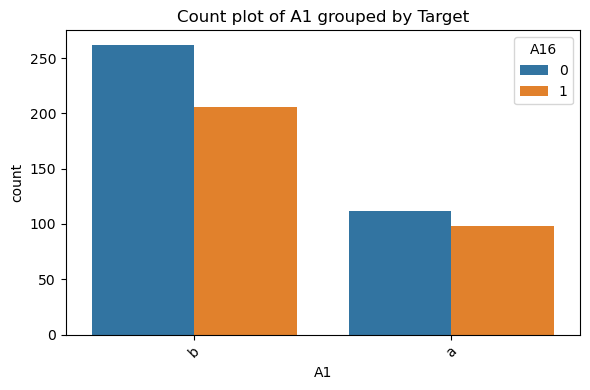

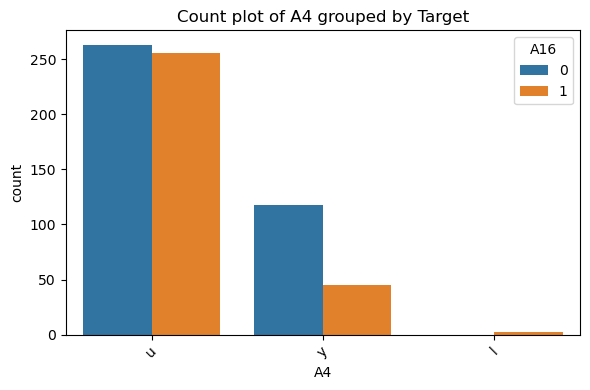

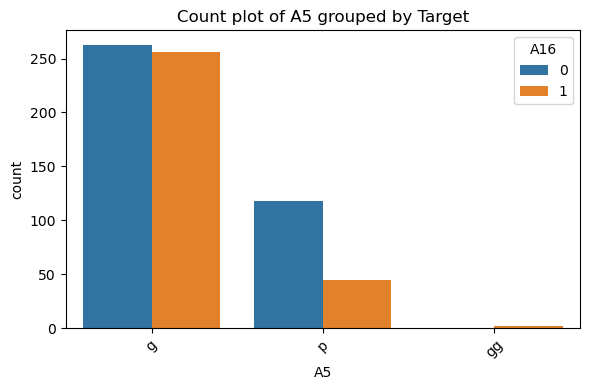

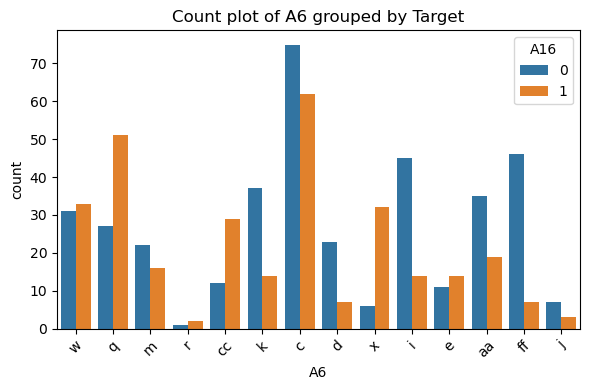

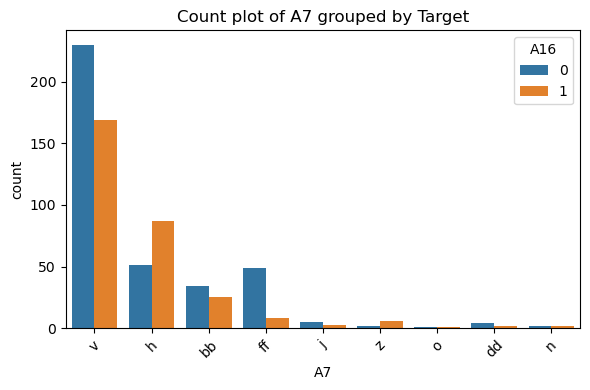

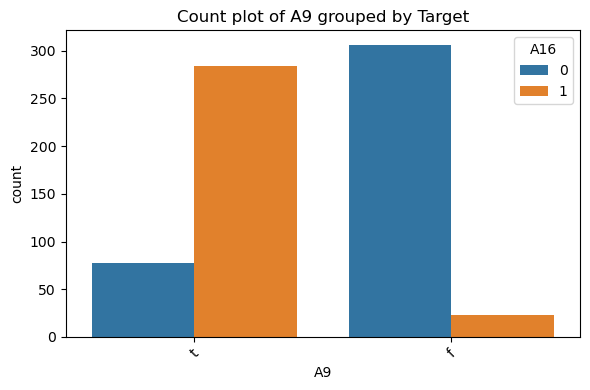

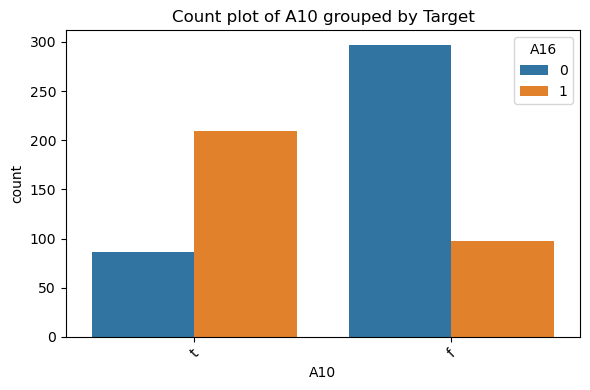

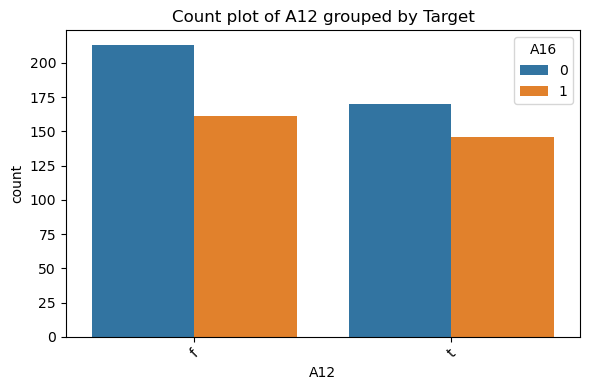

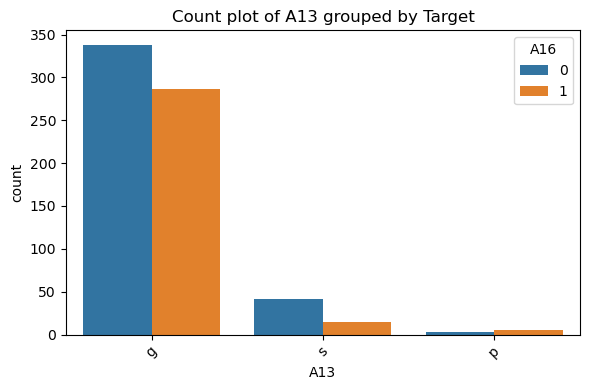

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

cat_features =['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13']
for col in cat_features:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='A16', data=df)
    plt.title(f'Count plot of {col} grouped by Target')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [11]:
cat_features = ['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13']

for col in cat_features:
    print(f"\n--{col}--")
    print(df[col].value_counts(normalize=True))


--A1--
A1
b    0.690265
a    0.309735
Name: proportion, dtype: float64

--A4--
A4
u    0.758772
y    0.238304
l    0.002924
Name: proportion, dtype: float64

--A5--
A5
g     0.758772
p     0.238304
gg    0.002924
Name: proportion, dtype: float64

--A6--
A6
c     0.201175
q     0.114537
w     0.093979
i     0.086637
aa    0.079295
ff    0.077827
k     0.074890
cc    0.060206
m     0.055800
x     0.055800
d     0.044053
e     0.036711
j     0.014684
r     0.004405
Name: proportion, dtype: float64

--A7--
A7
v     0.585903
h     0.202643
bb    0.086637
ff    0.083700
j     0.011747
z     0.011747
dd    0.008811
n     0.005874
o     0.002937
Name: proportion, dtype: float64

--A9--
A9
t    0.523188
f    0.476812
Name: proportion, dtype: float64

--A10--
A10
f    0.572464
t    0.427536
Name: proportion, dtype: float64

--A12--
A12
f    0.542029
t    0.457971
Name: proportion, dtype: float64

--A13--
A13
g    0.905797
s    0.082609
p    0.011594
Name: proportion, dtype: float64


In [12]:
for col in cat_features:
    print(f"\n---- {col} vs Target ----")
    print(pd.crosstab(df[col], df['A16'], normalize='index'))



---- A1 vs Target ----
A16         0         1
A1                     
a    0.533333  0.466667
b    0.559829  0.440171

---- A4 vs Target ----
A16         0         1
A4                     
l    0.000000  1.000000
u    0.506744  0.493256
y    0.723926  0.276074

---- A5 vs Target ----
A16         0         1
A5                     
g    0.506744  0.493256
gg   0.000000  1.000000
p    0.723926  0.276074

---- A6 vs Target ----
A16         0         1
A6                     
aa   0.648148  0.351852
c    0.547445  0.452555
cc   0.292683  0.707317
d    0.766667  0.233333
e    0.440000  0.560000
ff   0.867925  0.132075
i    0.762712  0.237288
j    0.700000  0.300000
k    0.725490  0.274510
m    0.578947  0.421053
q    0.346154  0.653846
r    0.333333  0.666667
w    0.484375  0.515625
x    0.157895  0.842105

---- A7 vs Target ----
A16         0         1
A7                     
bb   0.576271  0.423729
dd   0.666667  0.333333
ff   0.859649  0.140351
h    0.369565  0.630435
j    0.625000  0

In [13]:
df['A16'].value_counts(normalize=True)

A16
0    0.555072
1    0.444928
Name: proportion, dtype: float64

In [14]:
for col in cat_features:
    freqs = df[col].value_counts(normalize=True)
    rare = freqs[freqs <0.05].index
    df[col] = df[col].apply(lambda x:'Other' if x in rare else x)

In [15]:
for col in cat_features:
        print(df[col].isnull().mean() *100)

1.7391304347826086
0.8695652173913043
0.8695652173913043
1.3043478260869565
1.3043478260869565
0.0
0.0
0.0
0.0


In [16]:
len(df['A16'])

690

In [17]:
df['A15'].isnull().sum()

0

## Handling missing values

In [18]:
for col in cat_features:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [19]:
numeric_cols = df.select_dtypes(include=['float64','int64']).columns.drop('A15','A16')

In [20]:
print(df[numeric_cols].dtypes)

A14    float64
A11      int64
A8     float64
A3     float64
A2     float64
A16      int64
dtype: object


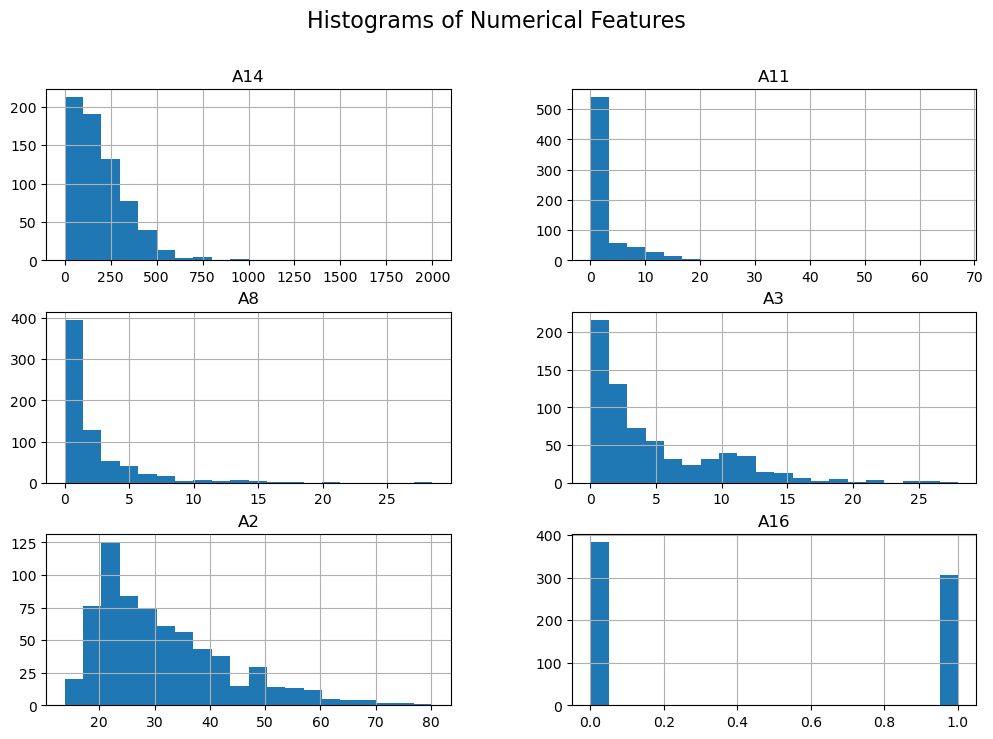

In [21]:
df[numeric_cols].hist(figsize=(12,8),bins=20)
plt.suptitle("Histograms of Numerical Features",fontsize=16)
plt.show()

In [22]:
print(df[numeric_cols].dtypes)

A14    float64
A11      int64
A8     float64
A3     float64
A2     float64
A16      int64
dtype: object


In [23]:

for col in numeric_cols:
    df[col].fillna(df[col].median(), inplace=True)

In [24]:

import numpy as np
for col in numeric_cols:
    np.log1p(df[col])

## Outlier detection

In [25]:
outlier_info = {}
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1-1.5*IQR
    upper_bound = Q3+1.5*IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col]>upper_bound)]
    num_outliers = outliers.shape[0]
    percent_outliers = (num_outliers / df.shape[0]) *100

    outlier_info[col] = {
            "Q1": Q1,
            "Q3": Q3,
            "IQR": IQR,
            "Lower Bound": lower_bound,
            "Upper Bound": upper_bound,
            "Outliers Count": num_outliers,
            "Outliers %": round(percent_outliers, 2)
        }

import pandas as pd
outlier_df = pd.DataFrame(outlier_info).T
outlier_df.sort_values(by="Outliers %", ascending=False)
    
    
    

,Q1,Q3,IQR,Lower Bound,Upper Bound,Outliers Count,Outliers %
A11,0.000,3.0000,3.0000,-4.50000,7.50000,79.0,11.45
A8,0.165,2.6250,2.4600,-3.52500,6.31500,63.0,9.13
A2,22.670,37.7075,15.0375,0.11375,60.26375,18.0,2.61
A3,1.000,7.2075,6.2075,-8.31125,16.51875,17.0,2.46
A14,80.000,272.0000,192.0000,-208.00000,560.00000,13.0,1.88
A16,0.000,1.0000,1.0000,-1.50000,2.50000,0.0,0.00


In [26]:
print(numeric_cols)

Index(['A14', 'A11', 'A8', 'A3', 'A2', 'A16'], dtype='object')


In [27]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3-Q1
    lower_bound = Q1-1.5*IQR
    upper_bound = Q3+1.5*IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col]>upper_bound)]
    num_outliers = outliers.shape[0]
    percent_outliers = (num_outliers / df.shape[0]) *100
    
    if percent_outliers < 5 :
        df = df[(df[col]>= lower_bound) & (df[col]<= upper_bound)]
        

In [28]:
skewness  = df[numeric_cols].skew()
skewed_cols = skewness[skewness > 1].index.tolist()
print(skewed_cols)

['A11', 'A8', 'A3']


In [29]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower, lower,
                       np.where(df[col] > upper, upper, df[col]))
    outlier_percent = ((df[col] < lower) | (df[col] > upper)).mean() * 100
    print(f"{col}: {outlier_percent:.2f}% outliers remaining")

A14: 0.00% outliers remaining
A11: 0.00% outliers remaining
A8: 0.00% outliers remaining
A3: 0.00% outliers remaining
A2: 0.00% outliers remaining
A16: 0.00% outliers remaining


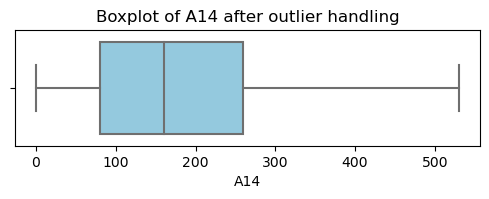

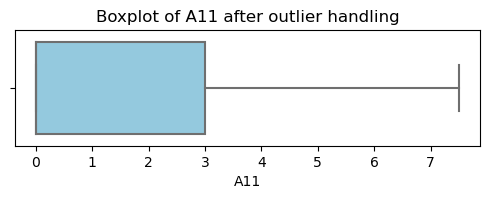

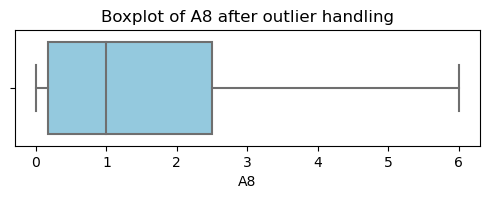

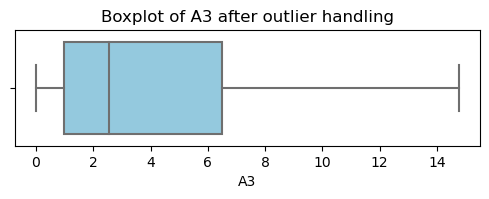

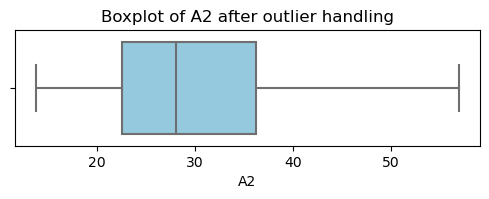

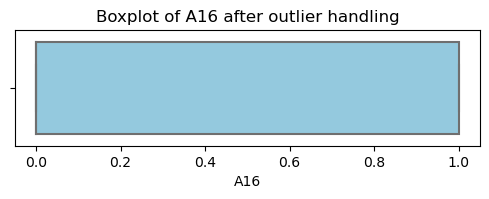

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in numeric_cols:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot of {col} after outlier handling')
    plt.show()



In [31]:
from numpy import log1p
for col in skewed_cols:
    df[col] = log1p(df[col])

## Data splitting and model training (Logistic Regression)

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report

In [33]:
X = df.drop(columns='A16')
y = df['A16']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [35]:
import category_encoders as ce

cat_cols = ['A1','A6','A4' ,'A5', 'A7', 'A9', 'A10', 'A12', 'A13'] 

encoder = ce.TargetEncoder(cols=cat_cols)

X_train[cat_cols] = encoder.fit_transform(X_train[cat_cols], y_train)

X_test[cat_cols] = encoder.transform(X_test[cat_cols])




## Model Training

In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

models = {
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
}

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{name}: {scores.mean():.4f}")


Random Forest: 0.8622
XGBoost: 0.8600
Logistic Regression: 0.8667


In [37]:
from sklearn.model_selection import cross_val_score

for name, model in models.items():
    f1 = cross_val_score(model, X_train, y_train, cv=5, scoring='f1').mean()
    roc = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc').mean()
    print(f"{name}: F1 = {f1:.4f}, ROC-AUC = {roc:.4f}")


Random Forest: F1 = 0.8445, ROC-AUC = 0.9268
XGBoost: F1 = 0.8430, ROC-AUC = nan
Logistic Regression: F1 = 0.8535, ROC-AUC = 0.9322
